<a href="https://colab.research.google.com/github/janduplessis883/linear-regression-population-health-01/blob/main/Linear_Regression_Population_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**: - Polulation Health
Jan du Plessis - *Data Science #1052*<BR>
Dataset: `jan-datasets/TGP2.csv`


### Data Prep

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
 
# Set style to 'seaborn' - high resolution graphs
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'

In [111]:
df = pd.read_csv('/content/TGP2.csv')
df

,REGDATE,SEX,AGE,SYS,DIAS,EGFR,ALT,FERR,CHOL
0,17/08/2010,Female,13,NaN,NaN,NaN,NaN,9.0,NaN
1,09/09/2010,Female,12,NaN,NaN,NaN,NaN,NaN,NaN
2,17/07/2014,Female,8,NaN,NaN,NaN,NaN,NaN,NaN
3,14/10/2011,Female,11,NaN,NaN,NaN,NaN,NaN,NaN
4,07/05/2020,Female,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8810,15/09/2017,Female,39,NaN,NaN,NaN,NaN,NaN,NaN
8811,15/10/2019,Male,39,128.0,81.0,NaN,NaN,NaN,NaN
8812,25/09/2019,Female,26,113.0,69.0,90,21.0,13.0,4.5
8813,10/07/2018,Male,47,120.0,78.0,90,43.0,166.0,5.0


In [119]:
df = df.replace(0, np.nan)

In [120]:
df['REGDATE'] = pd.to_datetime(df['REGDATE'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8815 entries, 0 to 8814
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   REGDATE  8815 non-null   datetime64[ns]
 1   SEX      8815 non-null   object        
 2   AGE      8763 non-null   float64       
 3   SYS      4914 non-null   float64       
 4   DIAS     4916 non-null   float64       
 5   EGFR     3317 non-null   object        
 6   ALT      3933 non-null   float64       
 7   FERR     2987 non-null   float64       
 8   CHOL     3454 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 619.9+ KB


## **Exploratory Analysis**

In [254]:
df.describe()

,AGE,SYS,DIAS,ALT,FERR,CHOL
count,8763.000000,4914.000000,4916.000000,3933.000000,2987.000000,3454.000000
mean,40.175625,122.161376,74.796379,26.798373,112.219417,4.994268
std,19.674870,15.799509,10.481735,25.729159,147.802723,1.105231
min,1.000000,71.000000,20.000000,5.000000,2.000000,1.600000
25%,27.000000,111.000000,68.000000,16.000000,35.000000,4.200000
50%,38.000000,121.000000,75.000000,21.000000,73.000000,4.900000
75%,54.000000,131.000000,81.000000,31.000000,141.000000,5.700000
max,114.000000,212.000000,186.000000,831.000000,2994.000000,13.400000


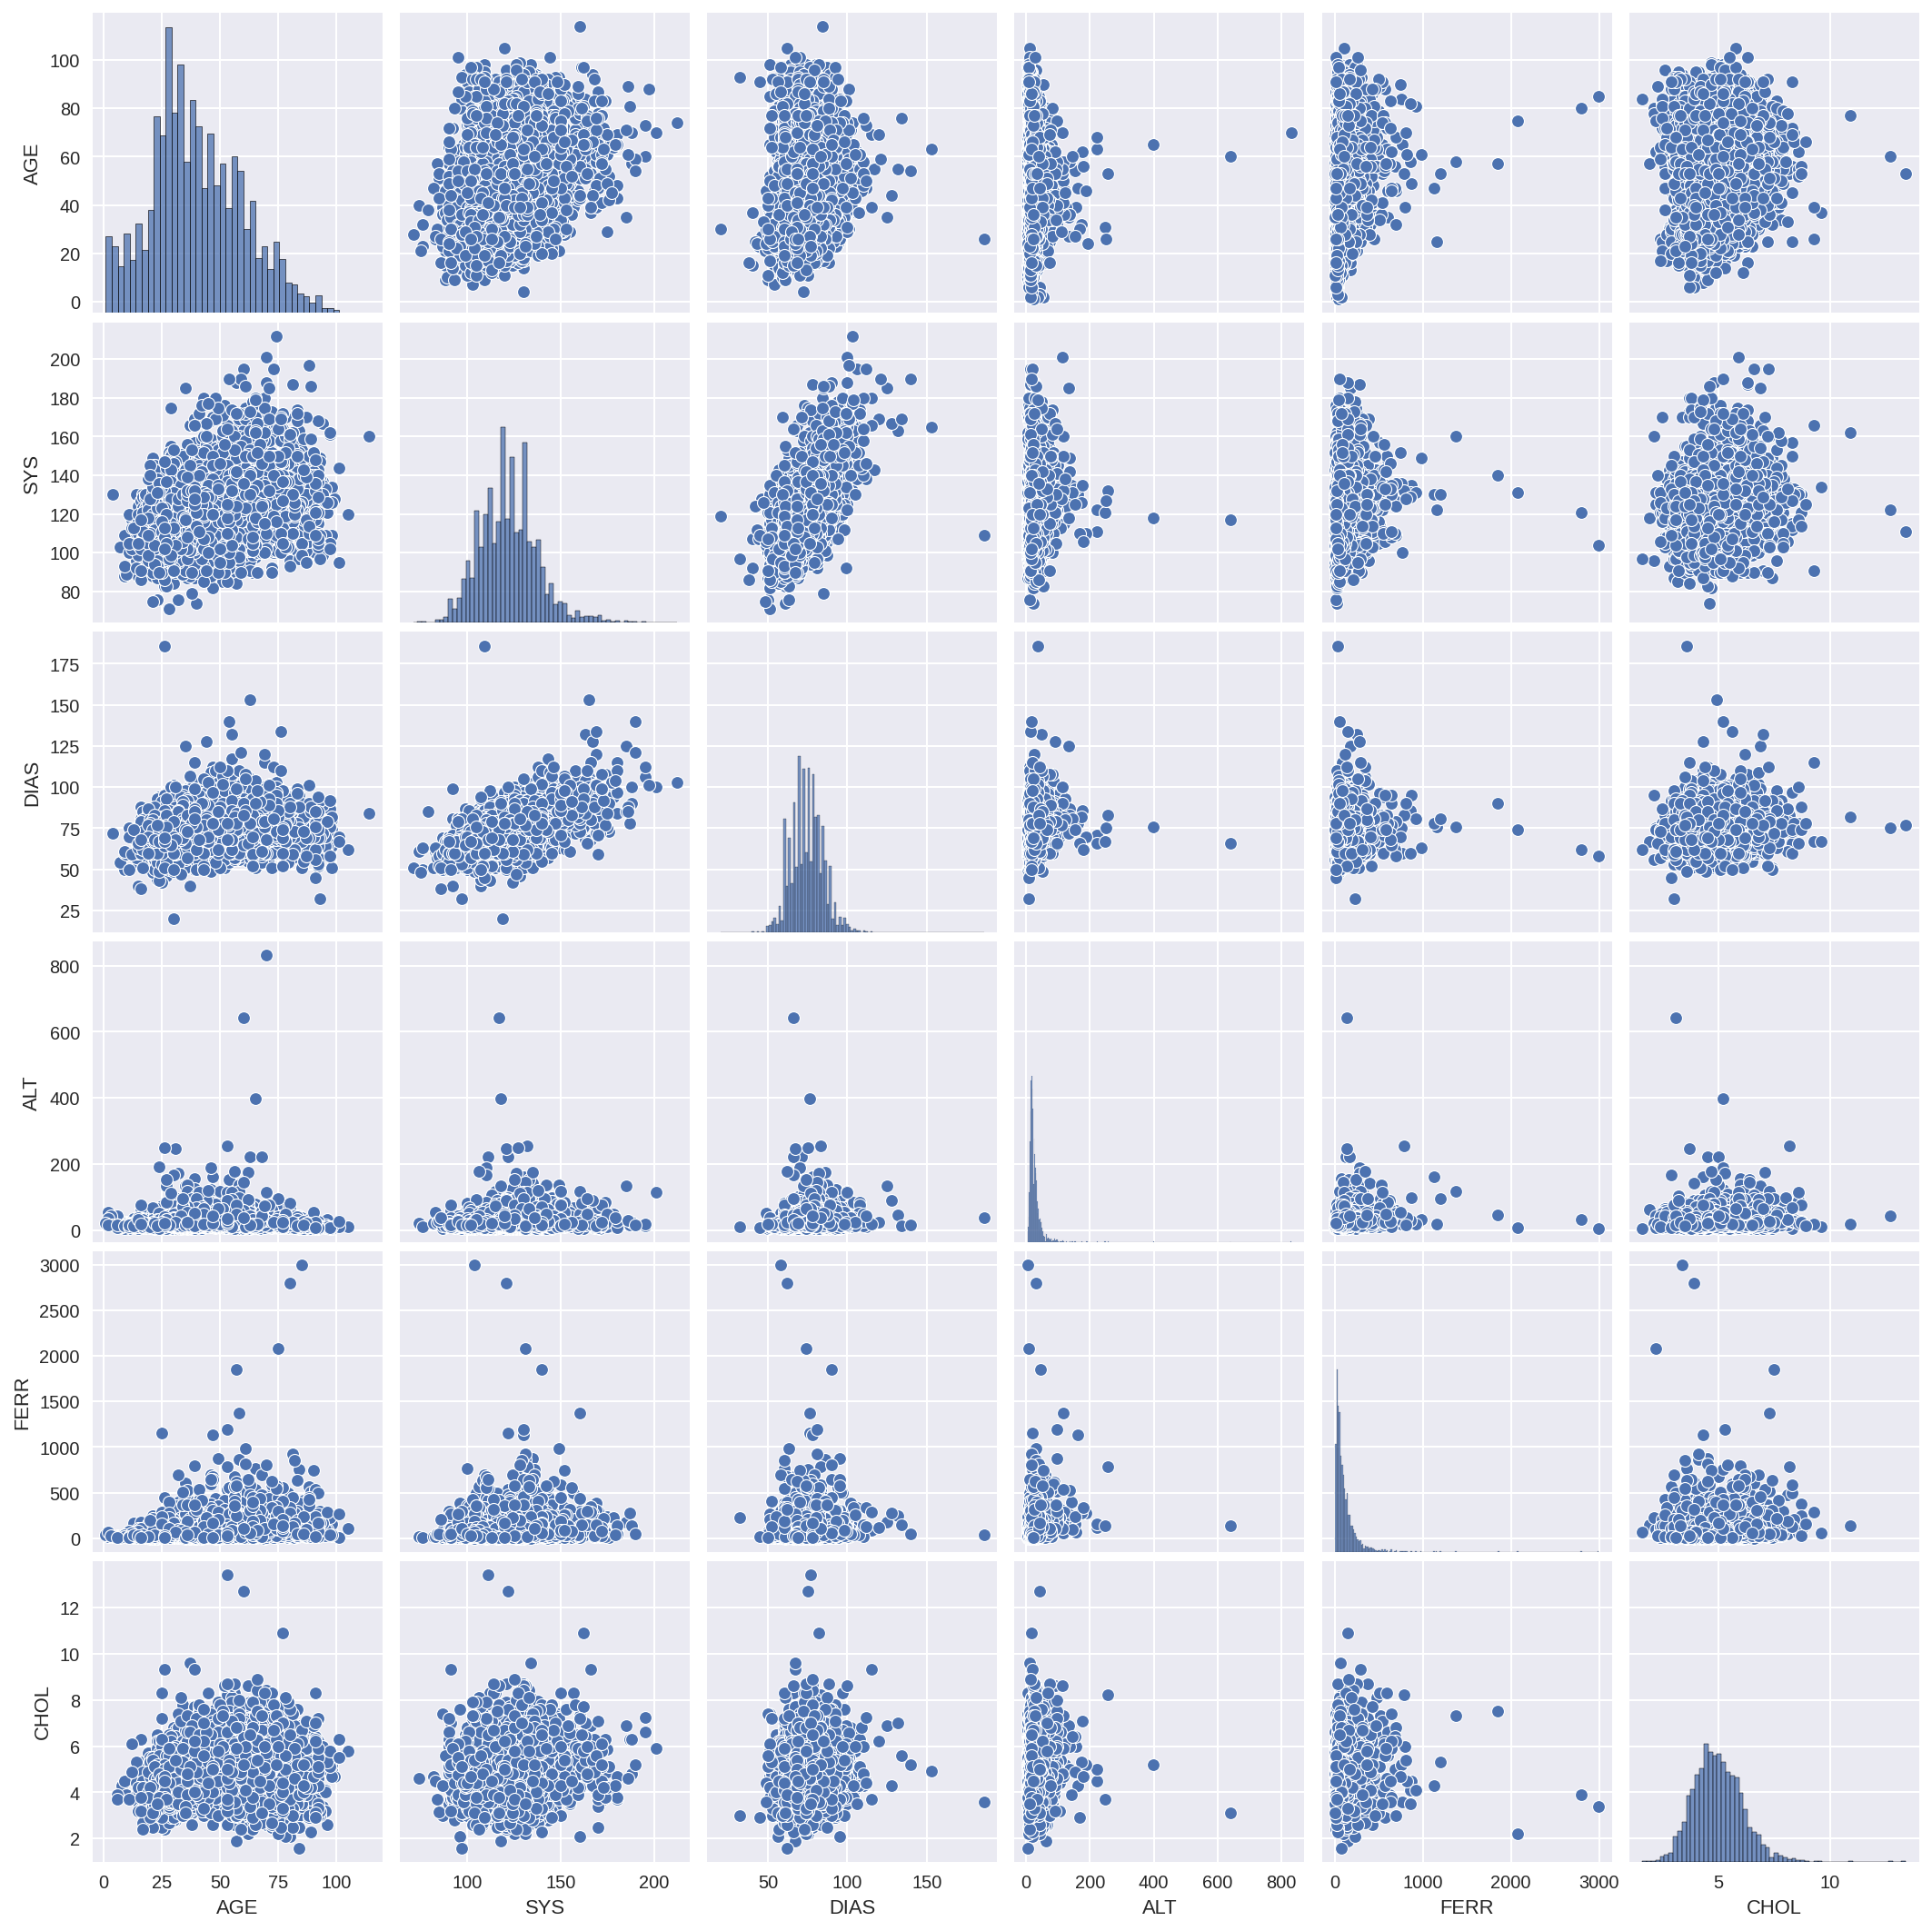

In [121]:
sns.pairplot(df)

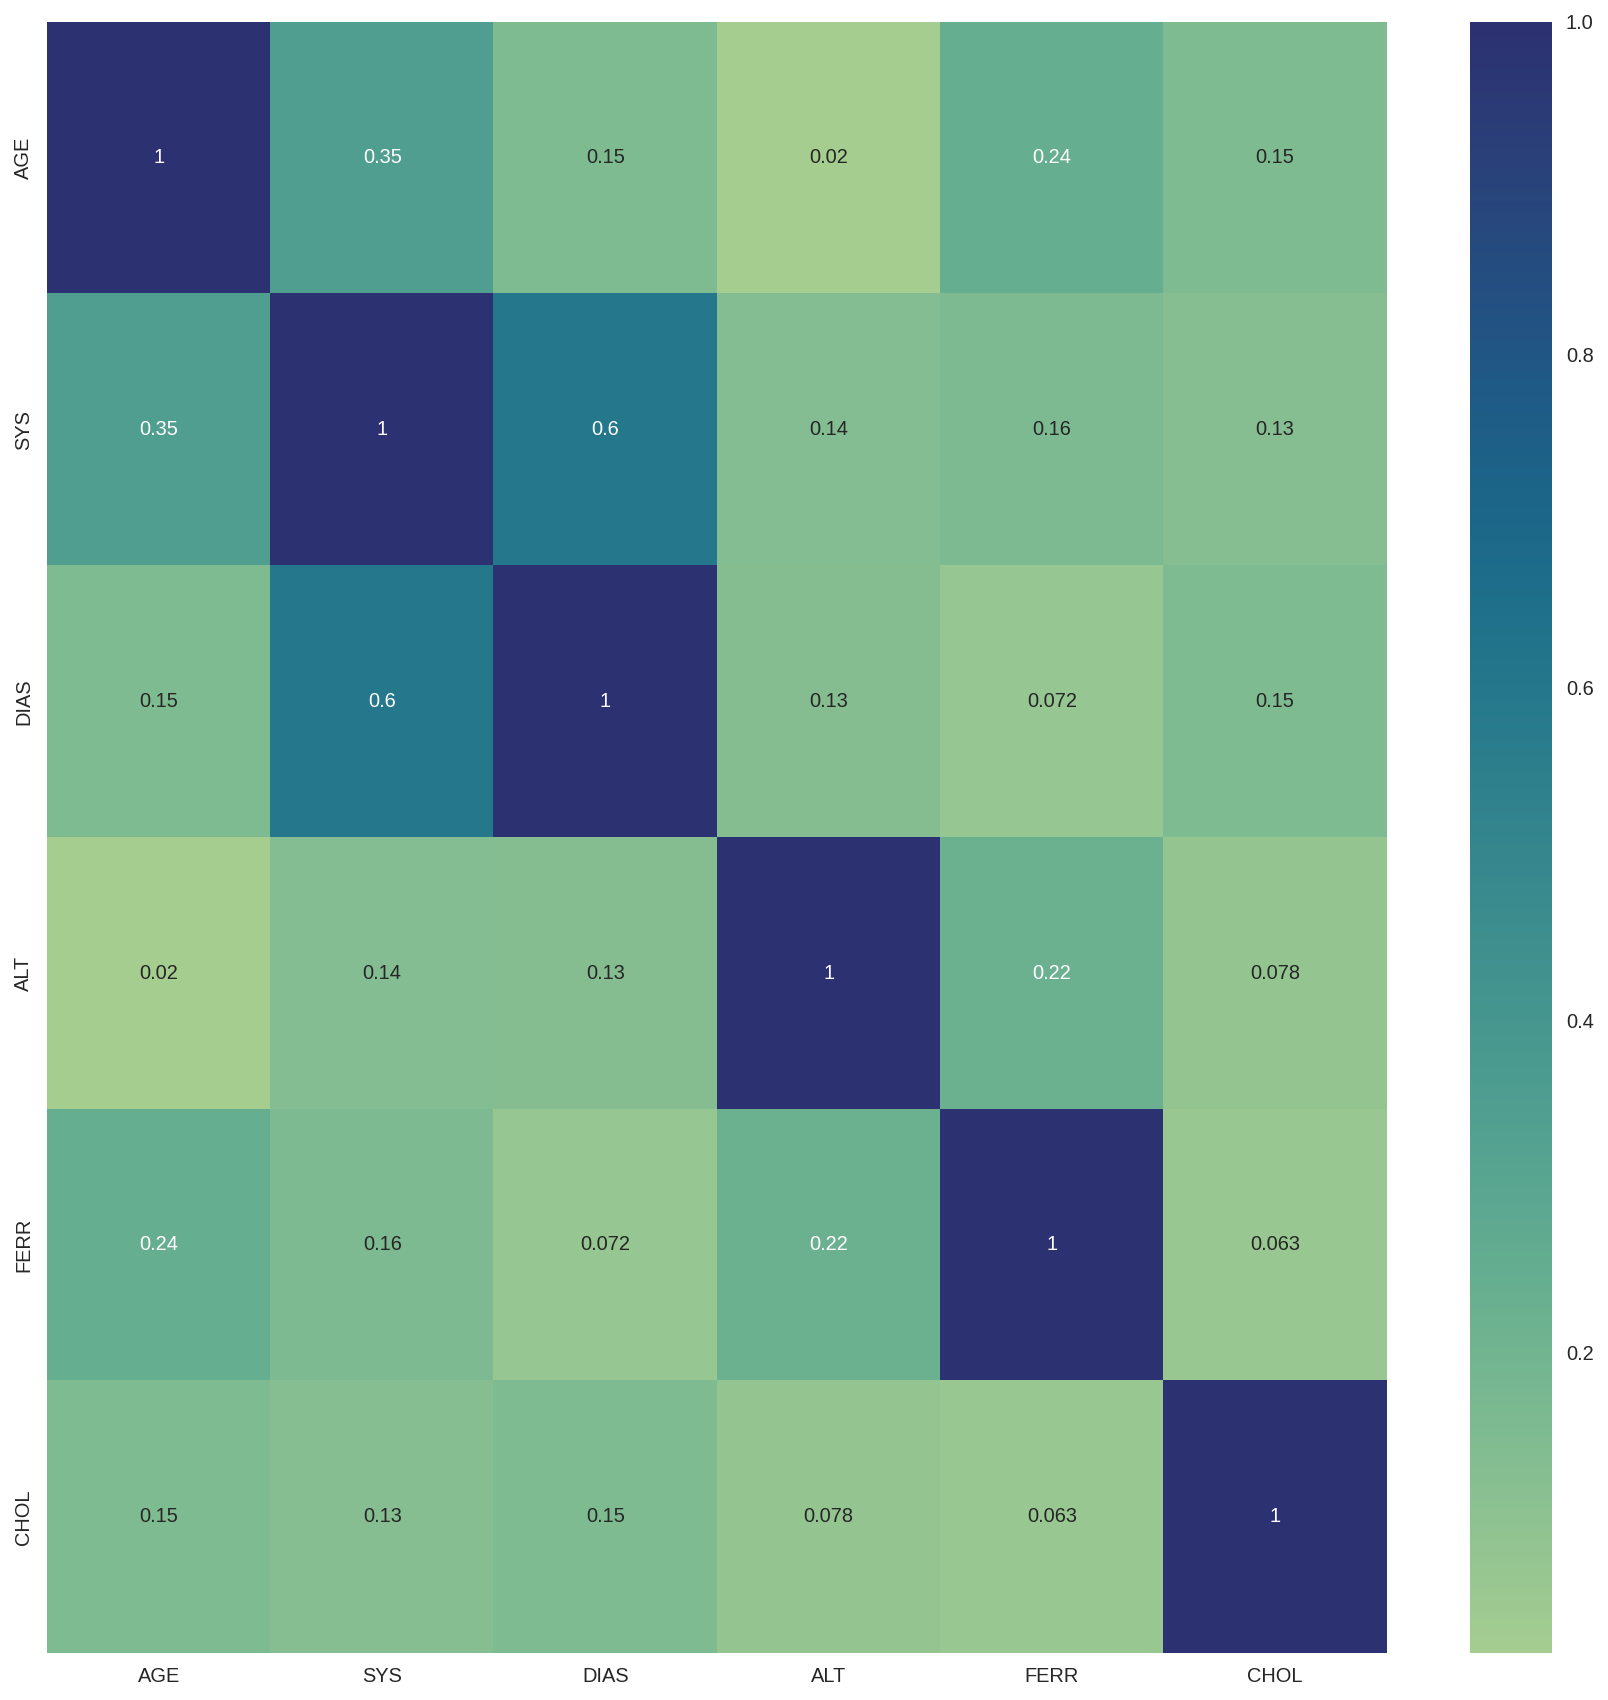

In [179]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (15, 15))

sns.heatmap(
    df.corr(), 
    cmap = 'crest', 
    annot = True, 
    annot_kws = {"size": 10}
)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


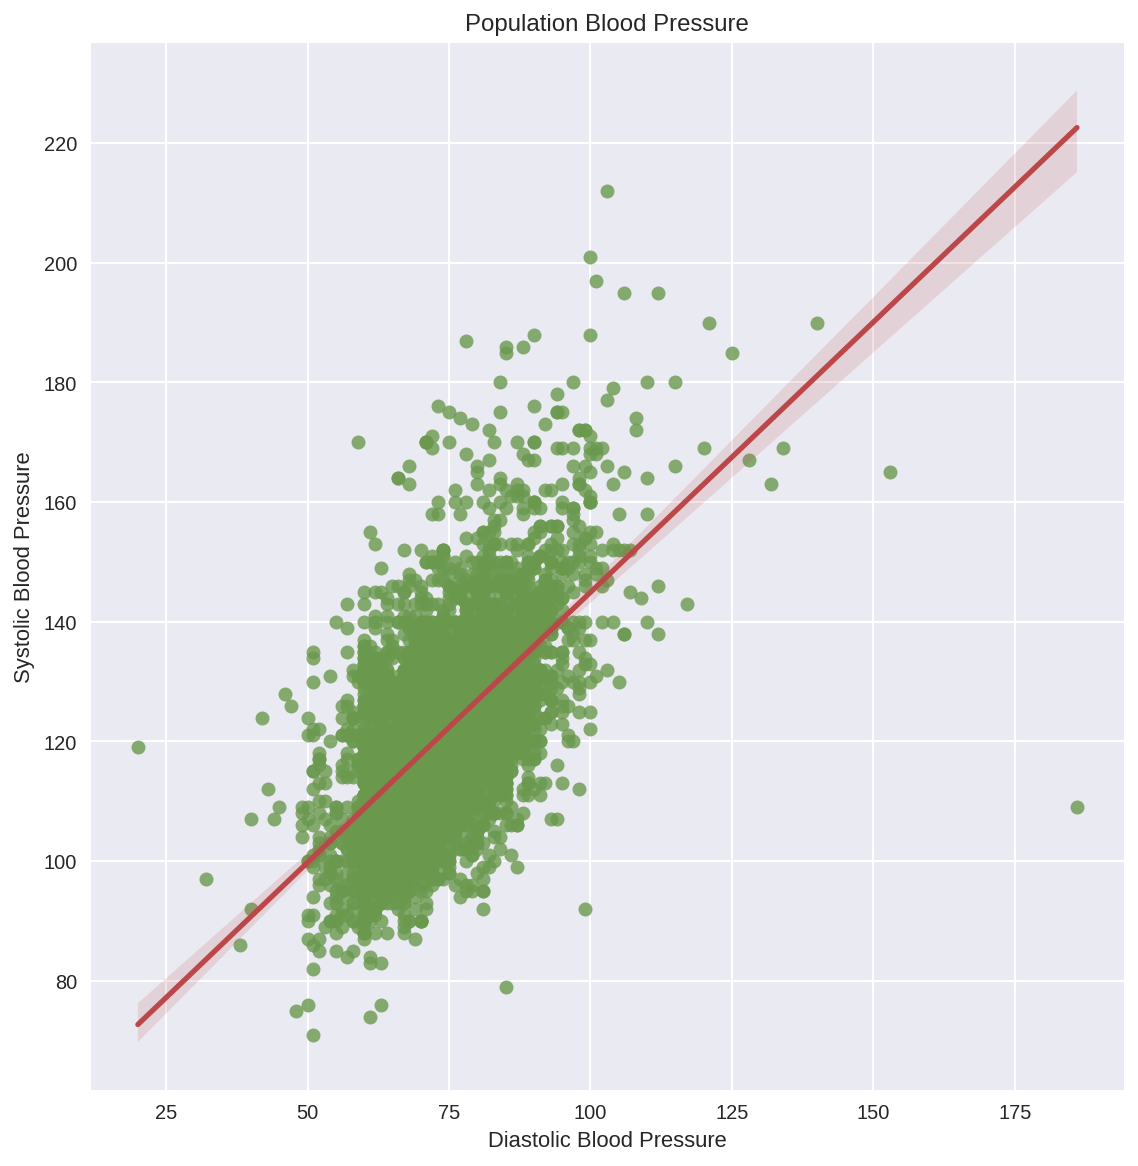

In [227]:
sns.lmplot(data=df, x='DIAS', y='SYS', scatter_kws={"color": "#6a994e"}, size=8, line_kws={"color": "#bc4749"})
plt.title('Population Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


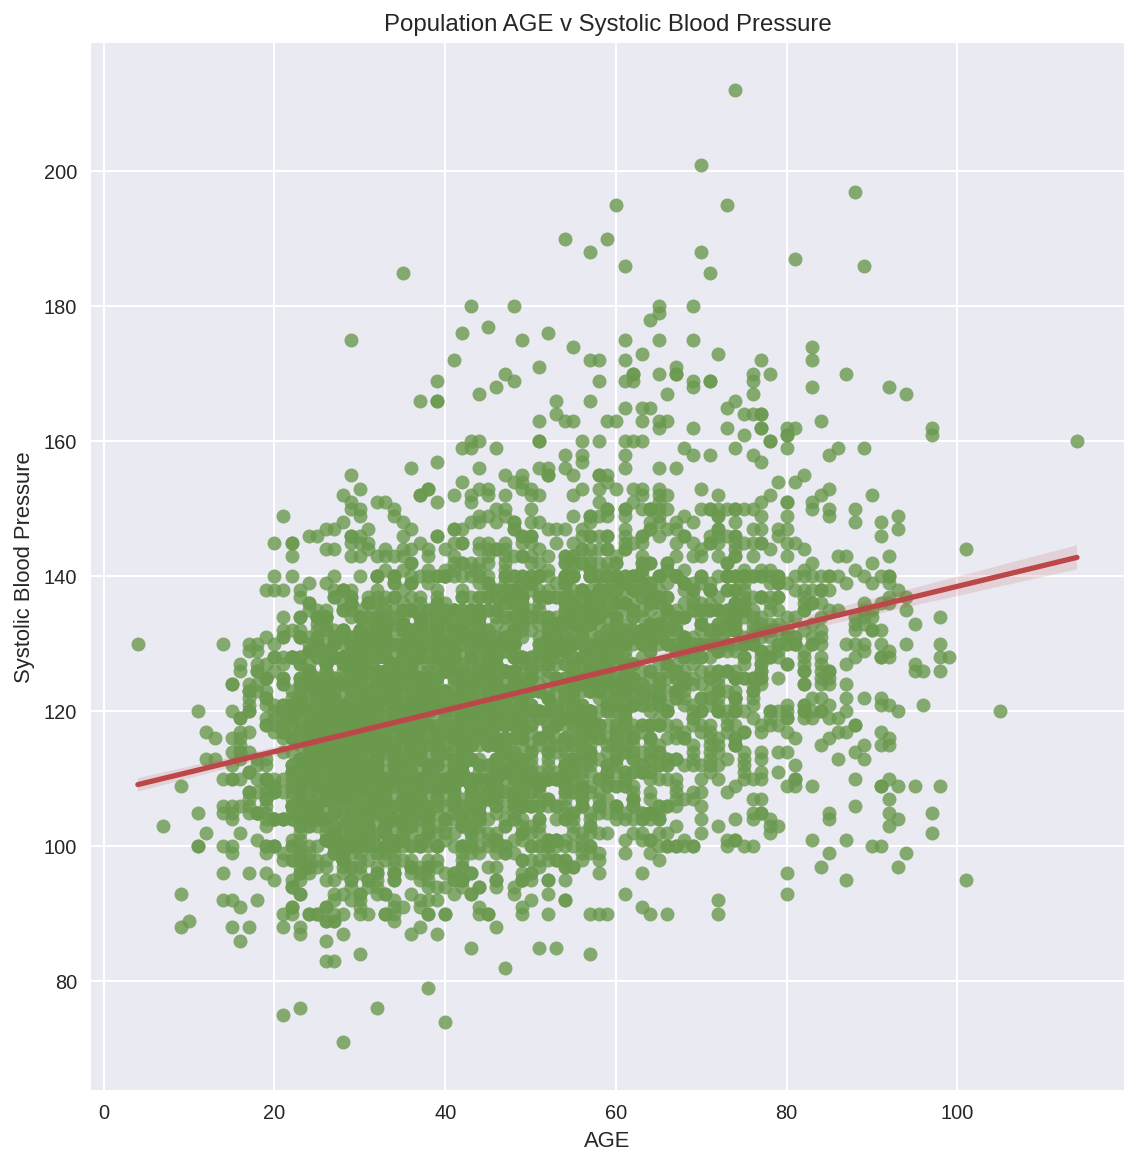

In [253]:
sns.lmplot(data=df, x='AGE', y='SYS', scatter_kws={"color": "#6a994e"}, size=8, line_kws={"color": "#bc4749"})
plt.title('Population AGE v Systolic Blood Pressure')
plt.xlabel('AGE')
plt.ylabel('Systolic Blood Pressure')
plt.legend()

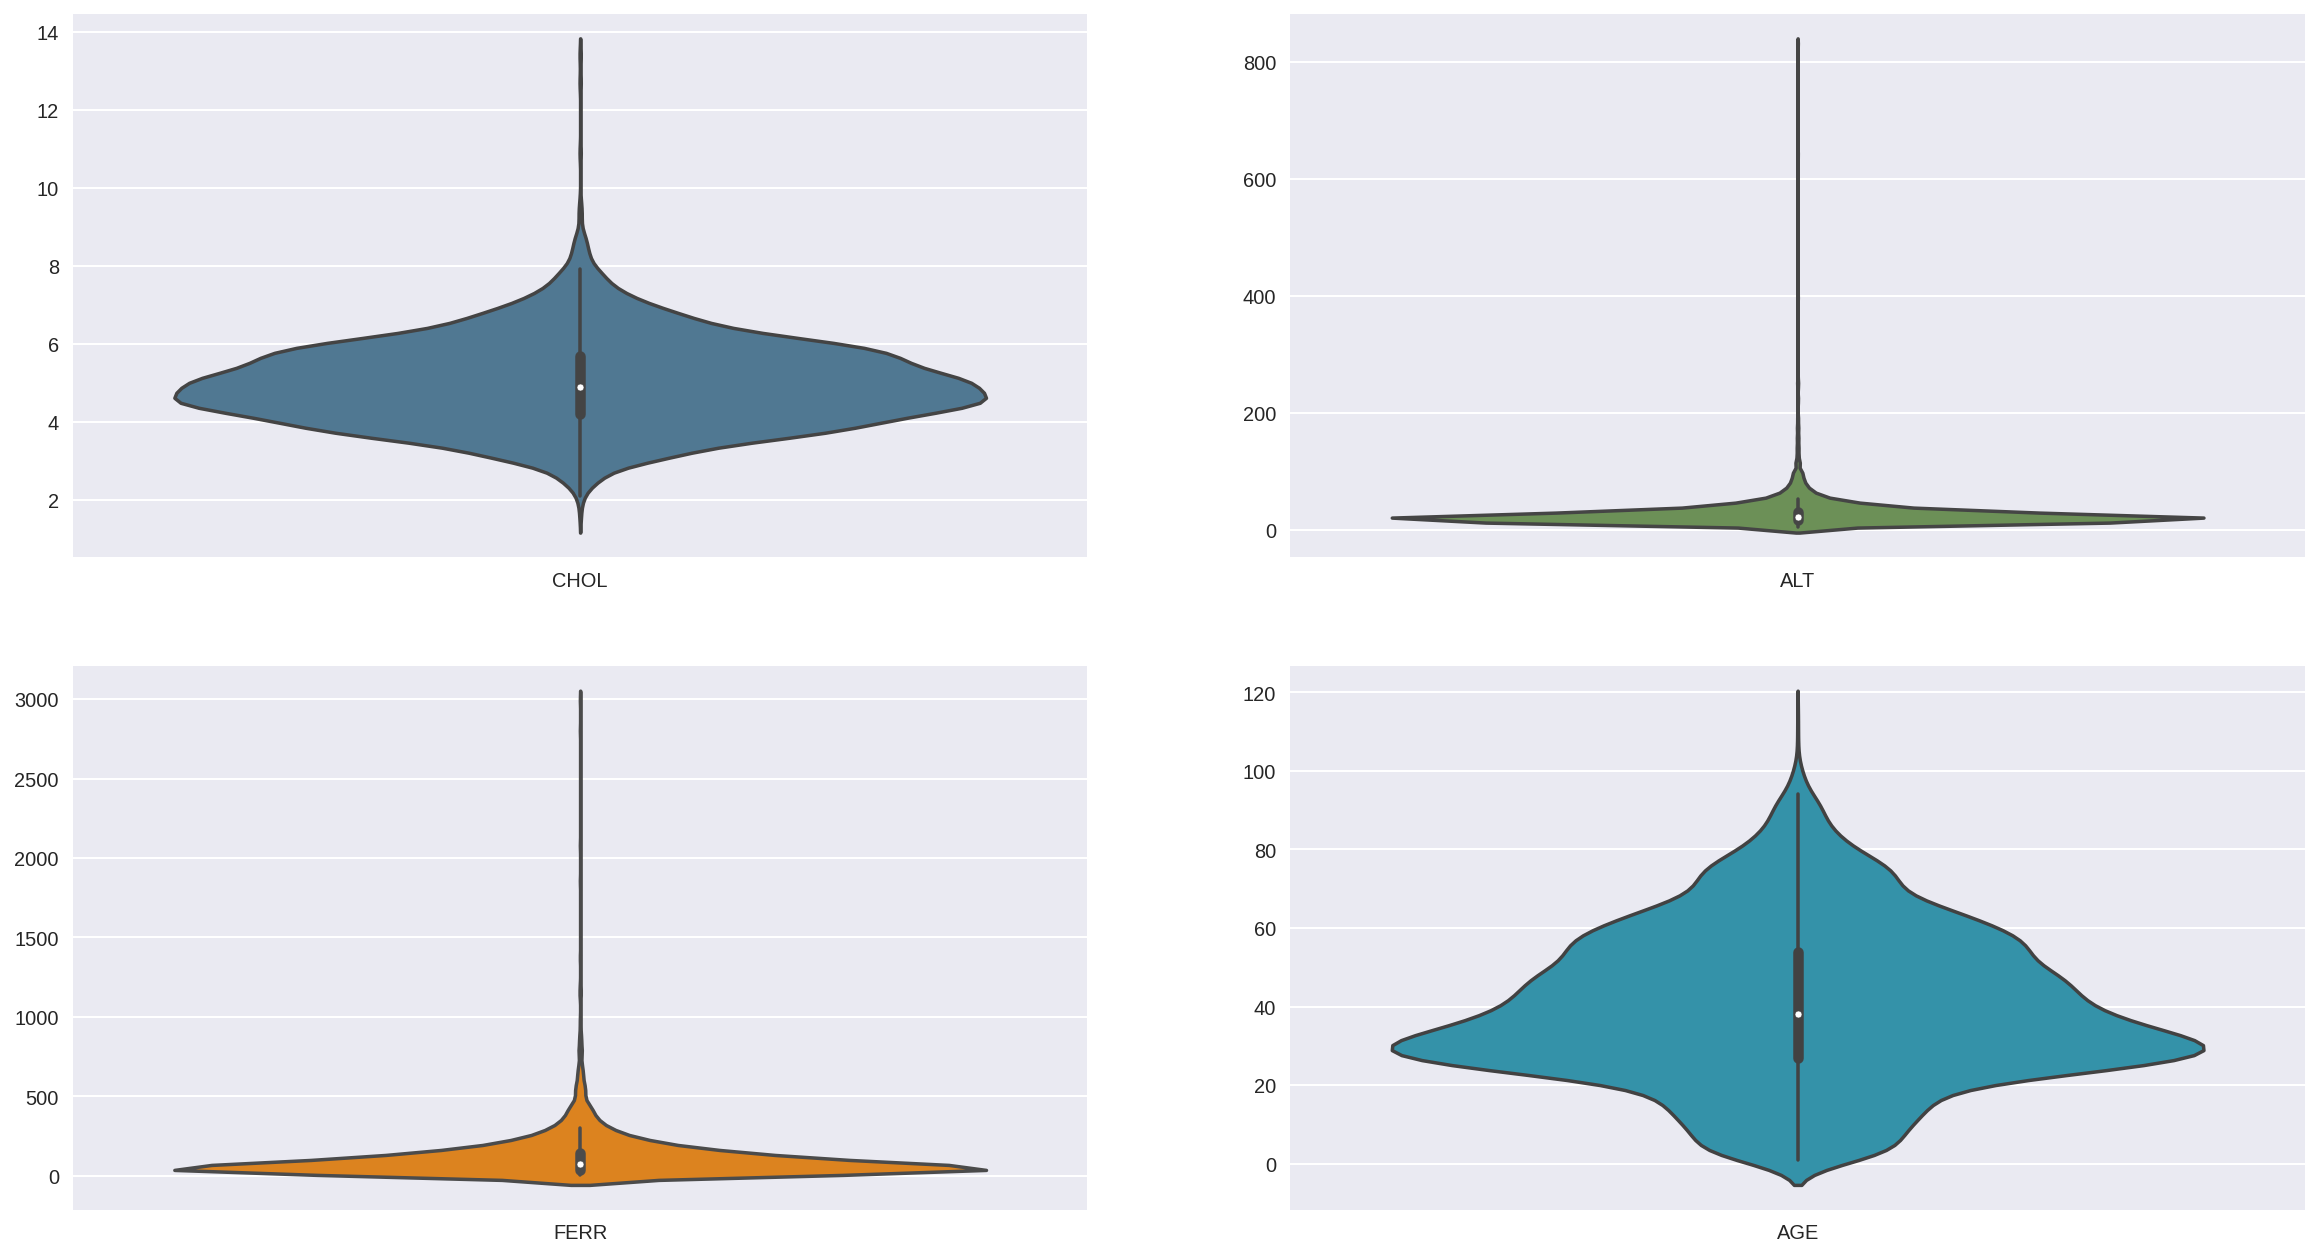

In [176]:
fig = plt.figure(figsize=(20,11))

plt.subplot(2, 2, 1)
sns.violinplot(data=df[['CHOL']], color='#457b9d')

plt.subplot(2, 2, 2)
sns.violinplot(data=df[['ALT']], color='#6a994e')


plt.subplot(2, 2, 3)
sns.violinplot(data=df[['FERR']], color='#fb8500')


plt.subplot(2, 2, 4)
sns.violinplot(data=df[['AGE']], color='#219ebc')

plt.show()

# **Linear Regression** - Dep Variable: **SYSTOLIC BP**

In [183]:
features = [
    "AGE",
    "DIAS",
    "FERR",
    "CHOL",
    "ALT"
]

In [184]:
df_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
df_standardized

,REGDATE,SEX,AGE,SYS,DIAS,EGFR,ALT,FERR,CHOL
0,2010-08-17,Female,-1.381235,NaN,NaN,NaN,NaN,-0.698359,NaN
1,2010-09-09,Female,-1.432062,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-17,Female,-1.635367,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-10-14,Female,-1.482888,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-07,Female,-1.940324,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8810,2017-09-15,Female,-0.059753,NaN,NaN,NaN,NaN,NaN,NaN
8811,2019-10-15,Male,-0.059753,128.0,0.591851,NaN,NaN,NaN,NaN
8812,2019-09-25,Female,-0.720494,113.0,-0.552998,90,-0.225362,-0.671296,-0.447208
8813,2018-07-10,Male,0.346857,120.0,0.305638,90,0.629699,0.363867,0.005187


In [185]:
formula = "SYS ~ " + ' + '.join(features)
formula

'SYS ~ AGE + DIAS + FERR + CHOL + ALT'

In [187]:
import statsmodels.formula.api as smf

model = smf.ols(formula = formula, data = df_standardized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SYS   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     402.9
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          7.74e-318
Time:                        03:38:16   Log-Likelihood:                -9789.2
No. Observations:                2515   AIC:                         1.959e+04
Df Residuals:                    2509   BIC:                         1.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.5945      0.280    427.807      0.0

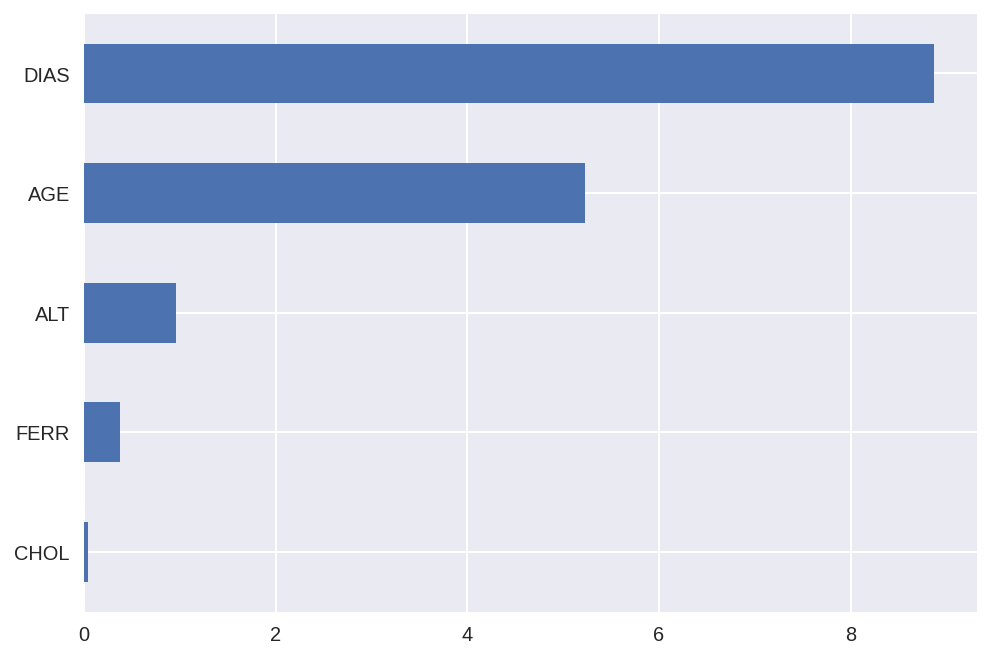

In [188]:
model.params[1:].sort_values().plot(kind='barh')

In [189]:
predicted_SYS = model.predict(df_standardized[features])
residuals = predicted_SYS - df_standardized.SYS

In [190]:
rmse = (residuals**2).mean()**0.5
rmse

11.862401442743732

Text(0.5, 1.0, 'residuals density plot')

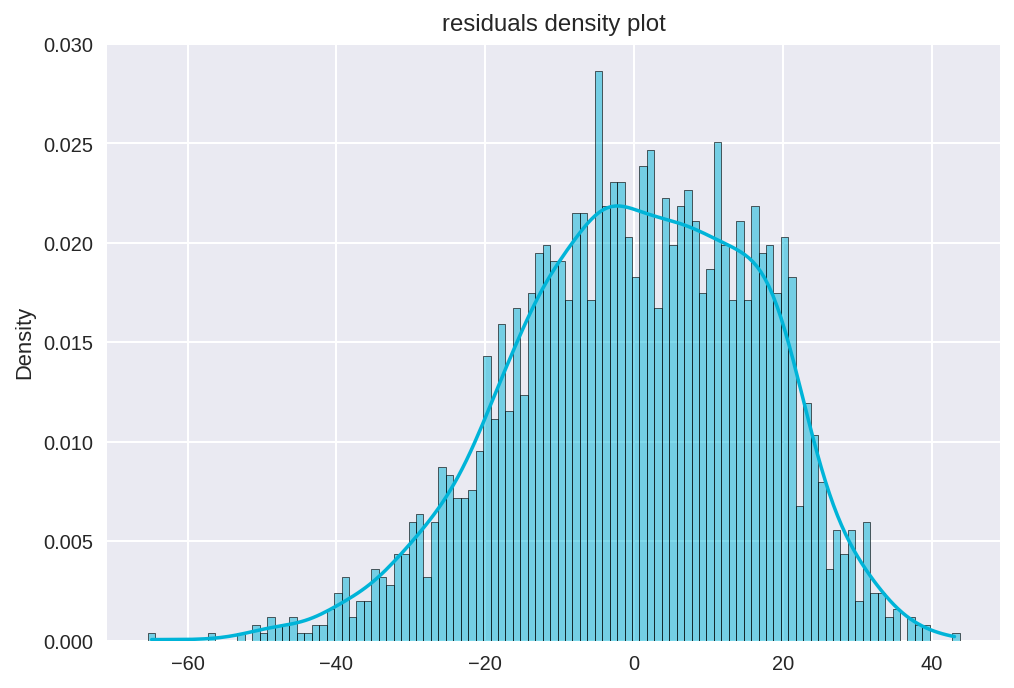

In [236]:
sns.histplot(residuals, kde=True, stat='density', discrete=True, color='#00b4d8')
plt.title('residuals density plot')

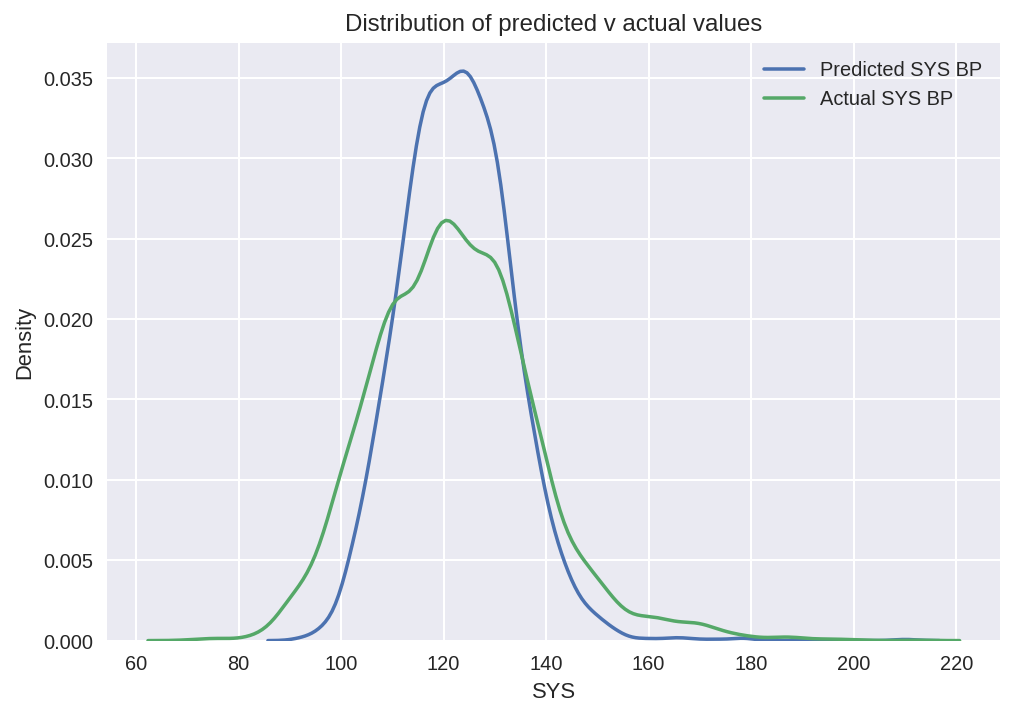

In [193]:
sns.kdeplot(predicted_SYS, label='Predicted SYS BP')
sns.kdeplot(df.SYS, label = 'Actual SYS BP')
plt.title('Distribution of predicted v actual values')
plt.legend()

### **Reg Plots** (DF Sample v DF Full) - DEP Variable: **SYSTOLIC BP**

(0.0, 236.70373706517591)

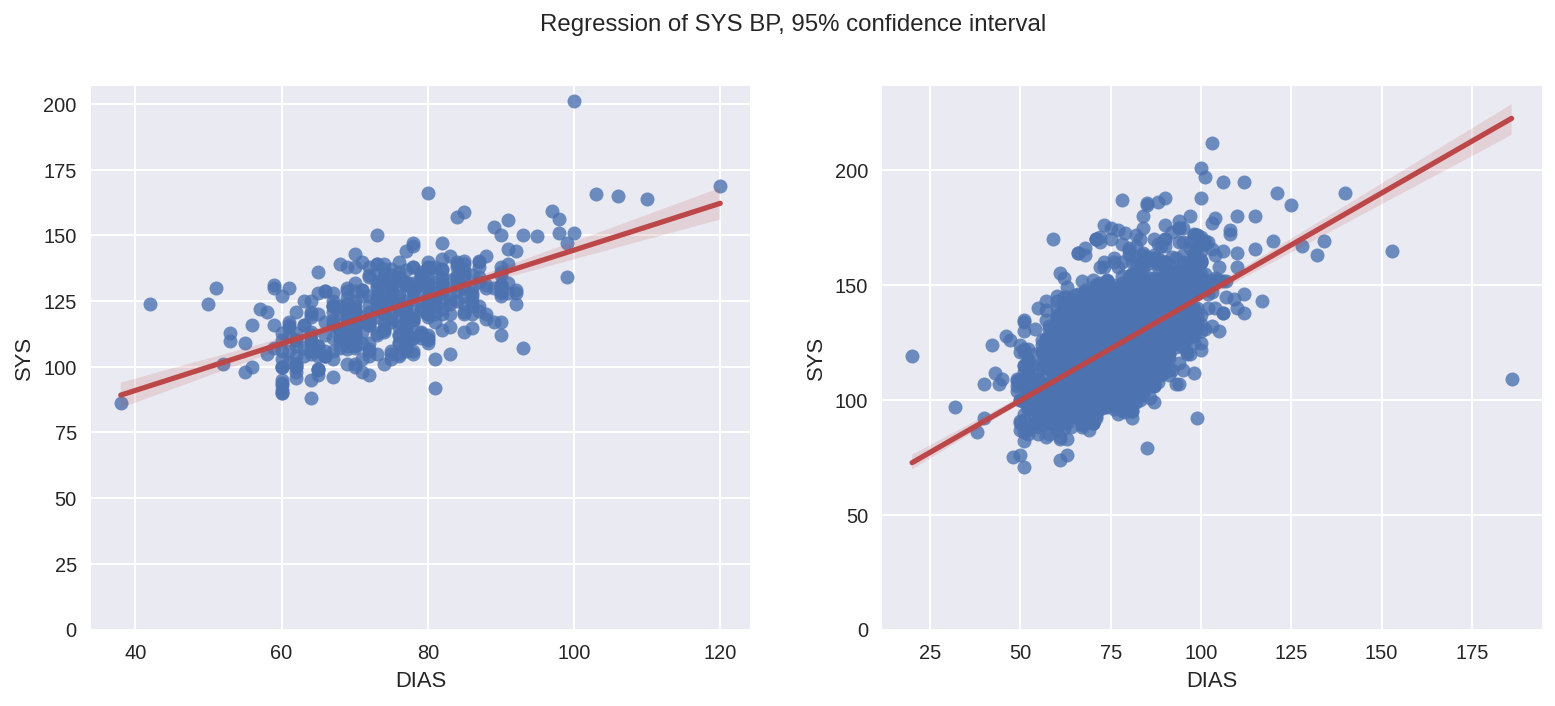

In [240]:
sample = df.sample(800, random_state=42)

plt.figure(figsize=(13,5))
plt.suptitle('Regression of SYS BP, 95% confidence interval')

plt.subplot(1,2,1)
sns.regplot(x = sample.DIAS, y= sample.SYS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = df.DIAS, y= df.SYS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

(0.0, 219.1098976453158)

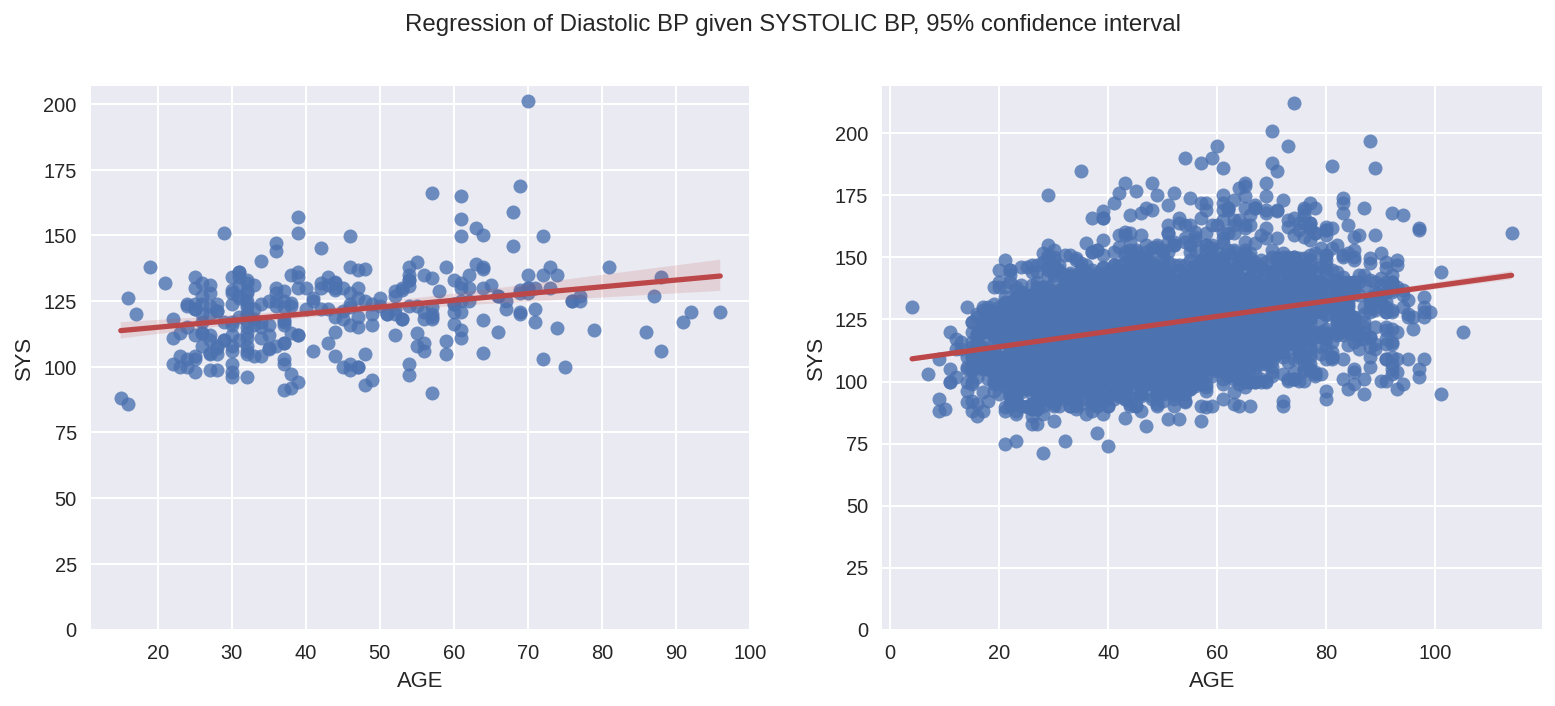

In [241]:
sample = df.sample(500, random_state=42)

plt.figure(figsize=(13,5))
plt.suptitle('Regression of Diastolic BP given SYSTOLIC BP, 95% confidence interval')

plt.subplot(1,2,1)
sns.regplot(x = sample.AGE, y= sample.SYS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = df.AGE, y= df.SYS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

(0.0, 207.31234447681007)

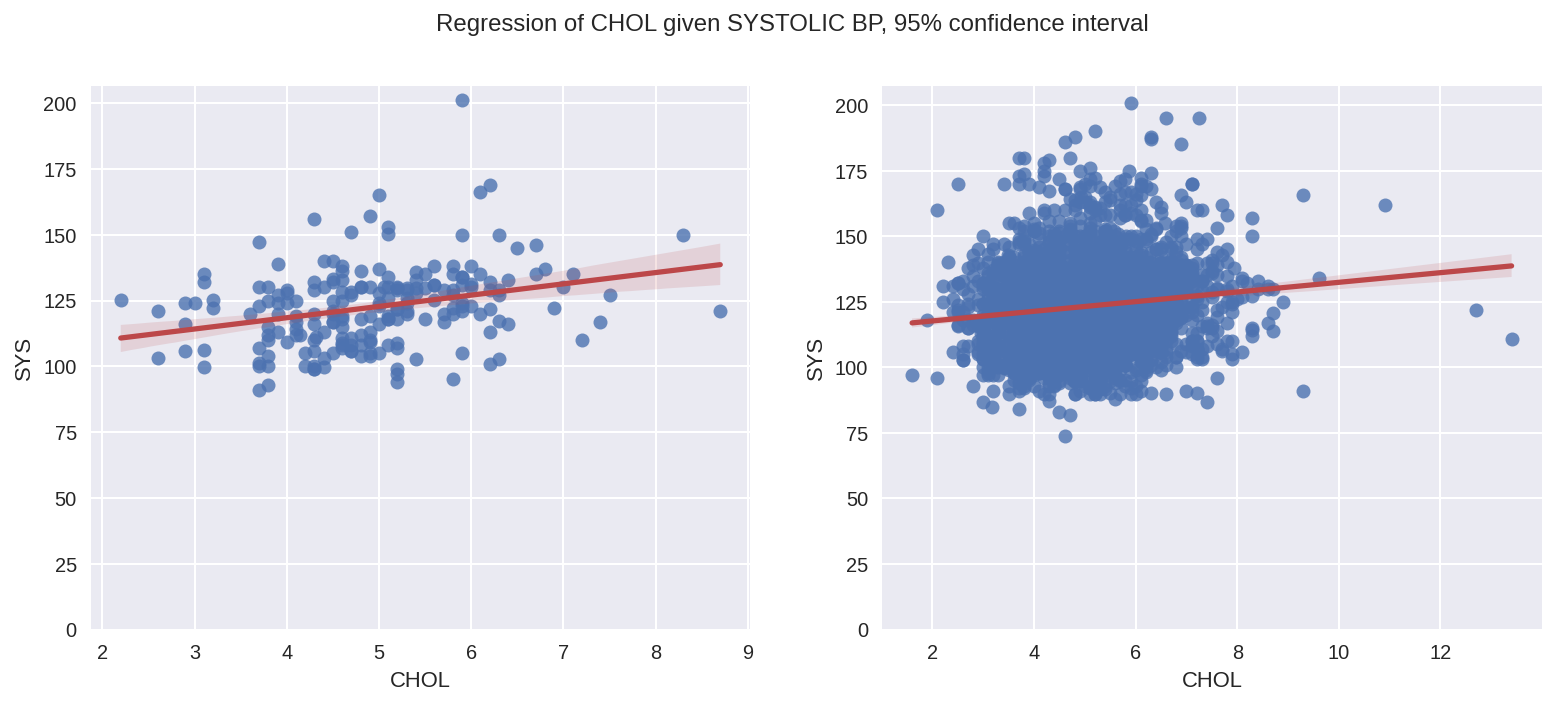

In [242]:
sample = df.sample(500, random_state=42)

plt.figure(figsize=(13,5))
plt.suptitle('Regression of CHOL given SYSTOLIC BP, 95% confidence interval')

plt.subplot(1,2,1)
sns.regplot(x = sample.CHOL, y= sample.SYS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = df.CHOL, y= df.SYS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

# **Linear Regression** - Dep Variable: **AGE**




/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


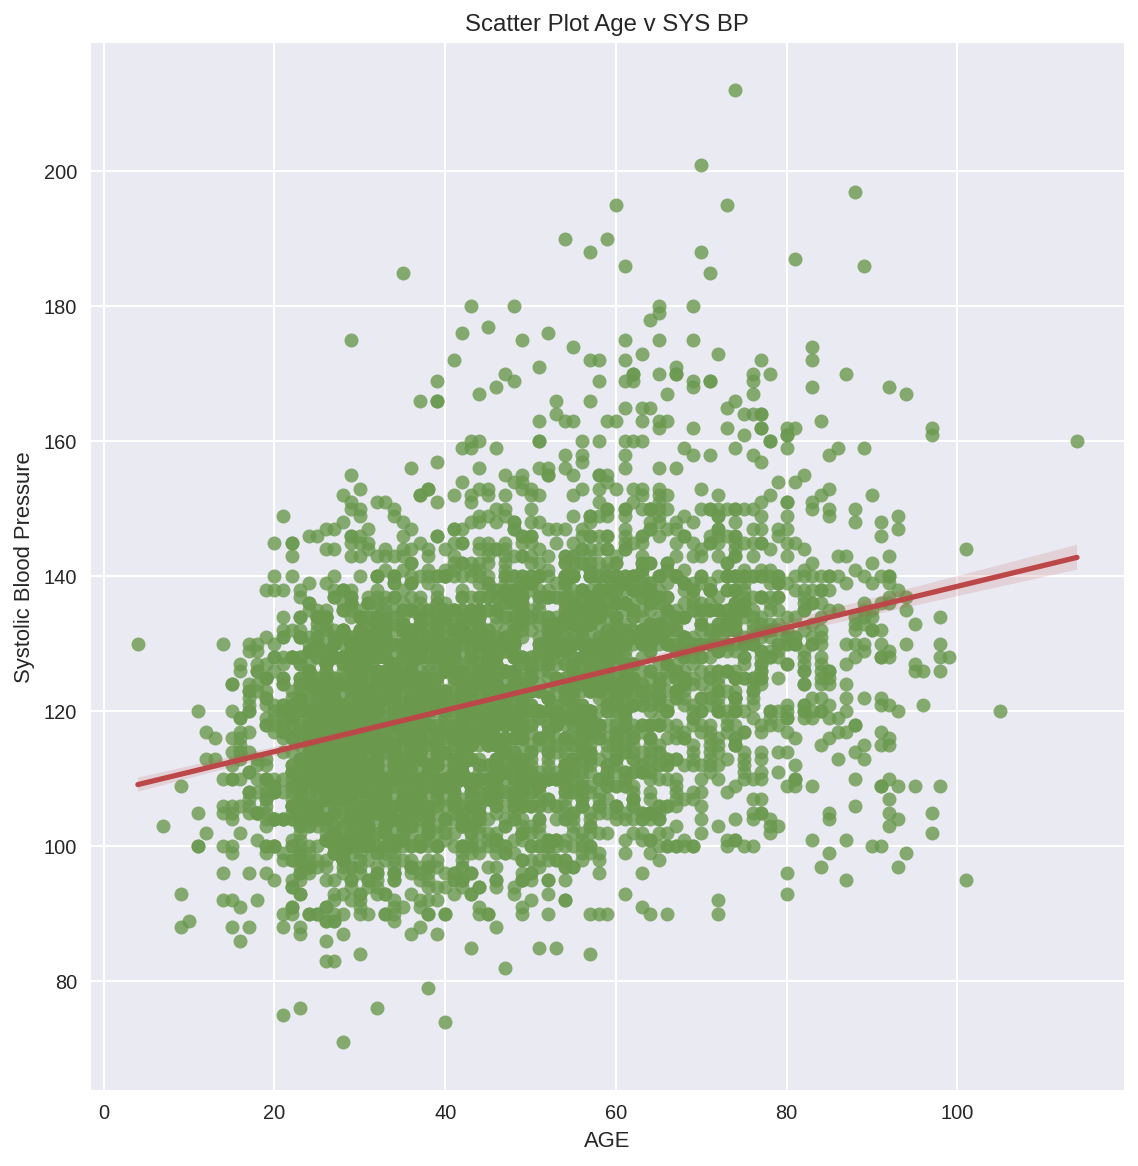

In [250]:
sns.lmplot(data=df, x='AGE', y='SYS', scatter_kws={"color": "#6a994e"}, size=8, line_kws={"color": "#bc4749"})
plt.title('Scatter Plot Age v SYS BP')
plt.xlabel('AGE')
plt.ylabel('Systolic Blood Pressure')
plt.legend()
plt.show()

In [218]:
features2 = [
    "SYS",
    "DIAS",
    "FERR",
    "CHOL",
    "ALT"
]

In [220]:
df_standardized2 = df.copy()
for f in features2:
    mu = df[f].mean()
    sigma = df[f].std()
    df_standardized2[f] = df[f].map(lambda x: (x - mu) / sigma)
df_standardized2

,REGDATE,SEX,AGE,SYS,DIAS,EGFR,ALT,FERR,CHOL
0,2010-08-17,Female,13.0,NaN,NaN,NaN,NaN,-0.698359,NaN
1,2010-09-09,Female,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-17,Female,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-10-14,Female,11.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-07,Female,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8810,2017-09-15,Female,39.0,NaN,NaN,NaN,NaN,NaN,NaN
8811,2019-10-15,Male,39.0,0.369545,0.591851,NaN,NaN,NaN,NaN
8812,2019-09-25,Female,26.0,-0.579852,-0.552998,90,-0.225362,-0.671296,-0.447208
8813,2018-07-10,Male,47.0,-0.136800,0.305638,90,0.629699,0.363867,0.005187


In [221]:
formula2 = "AGE ~ " + ' + '.join(features2)
formula2

'AGE ~ SYS + DIAS + FERR + CHOL + ALT'

In [222]:
import statsmodels.formula.api as smf

model2 = smf.ols(formula = formula, data = df_standardized2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    AGE   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     120.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          4.40e-114
Time:                        04:17:53   Log-Likelihood:                -10601.
No. Observations:                2515   AIC:                         2.121e+04
Df Residuals:                    2509   BIC:                         2.125e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.9816      0.328    155.488      0.0

In [238]:
predicted_AGE = model2.predict(df_standardized2[features2])
residuals2 = predicted_AGE - df_standardized2.AGE

In [224]:
rmse = (residuals**2).mean()**0.5
rmse

16.381668005090376

Text(0.5, 1.0, 'Residuals density plot')

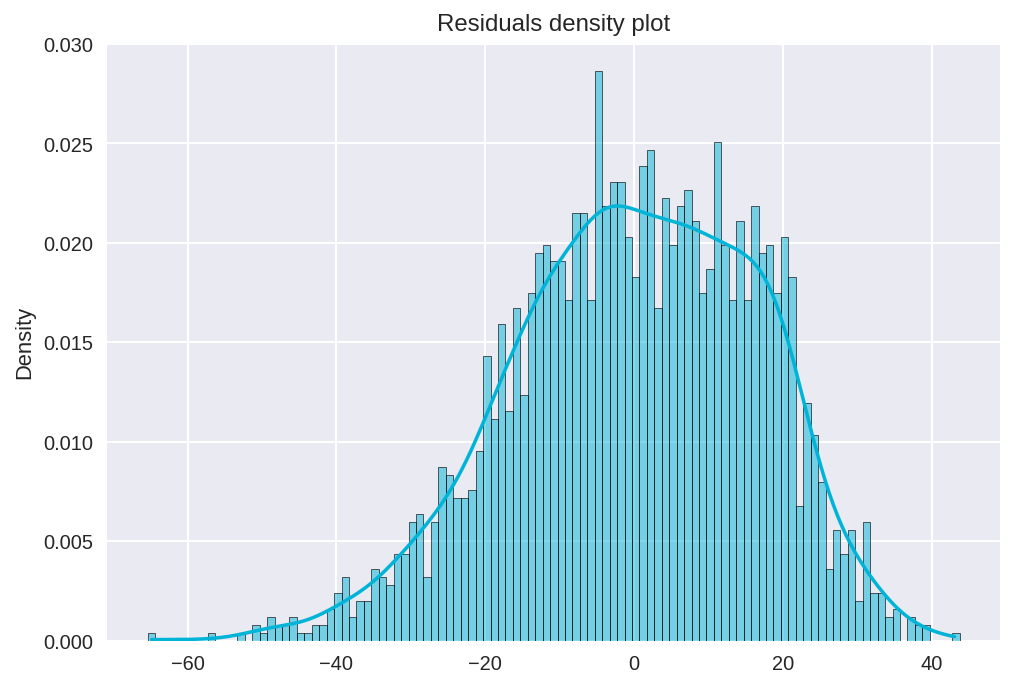

In [239]:
sns.histplot(residuals2, kde=True, stat='density', discrete=True, color='#00b4d8')
plt.title('Residuals density plot')

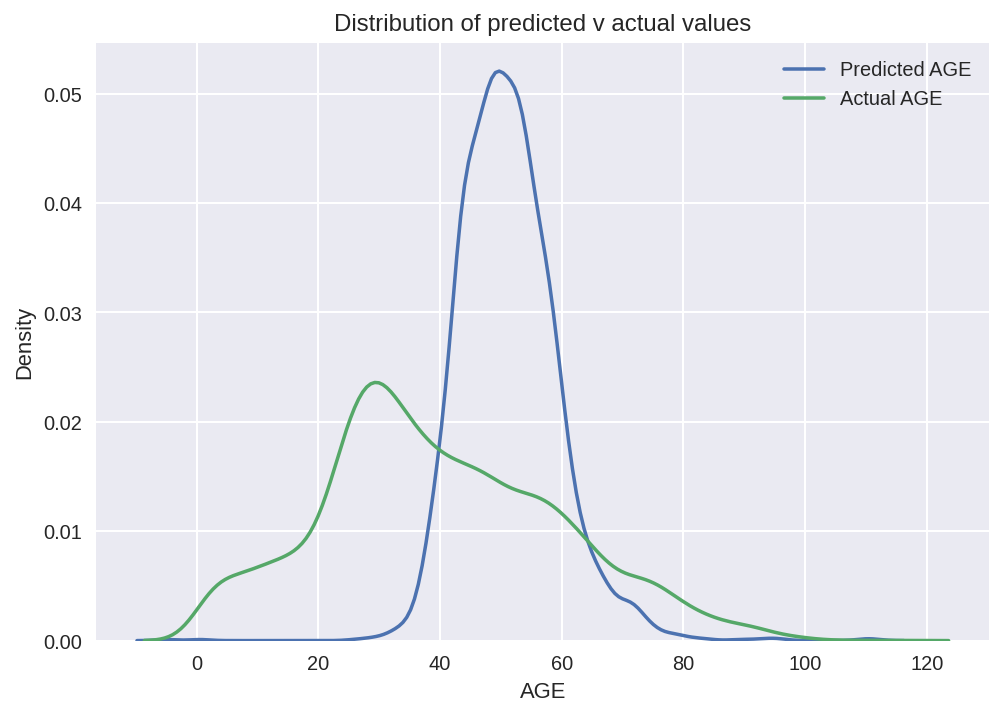

In [226]:
sns.kdeplot(predicted_AGE, label='Predicted AGE')
sns.kdeplot(df.AGE, label = 'Actual AGE')
plt.title('Distribution of predicted v actual values')
plt.legend()

### **Reg Plots** (DF Sample v DF Full) - DEP Variable: **AGE**

(0.0, 219.14759114551313)

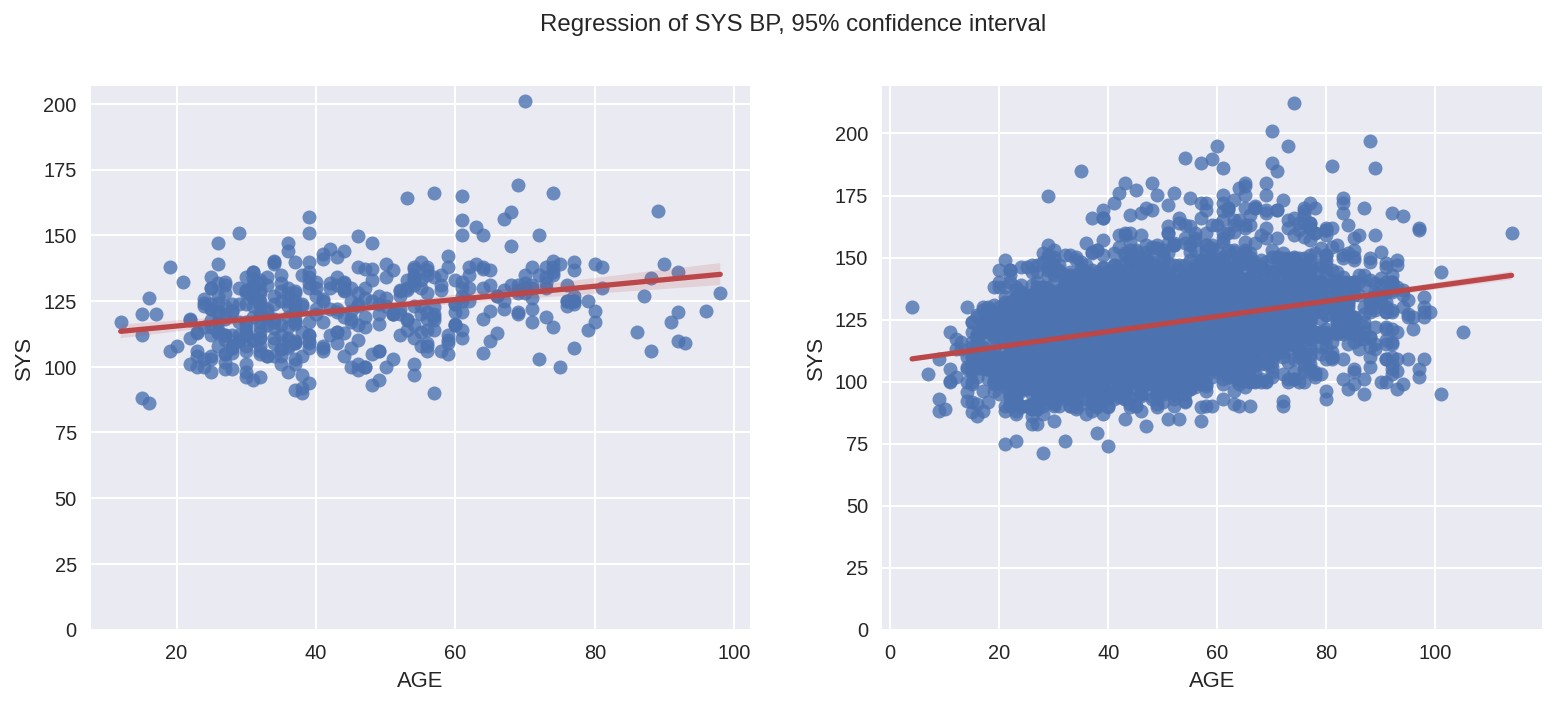

In [245]:
sample2 = df.sample(800, random_state=42)

plt.figure(figsize=(13,5))
plt.suptitle('Regression of AGE, 95% confidence interval')

plt.subplot(1,2,1)
sns.regplot(x = sample2.AGE, y = sample2.SYS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = df.AGE, y= df.SYS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

(0.0, 194.26508003343955)

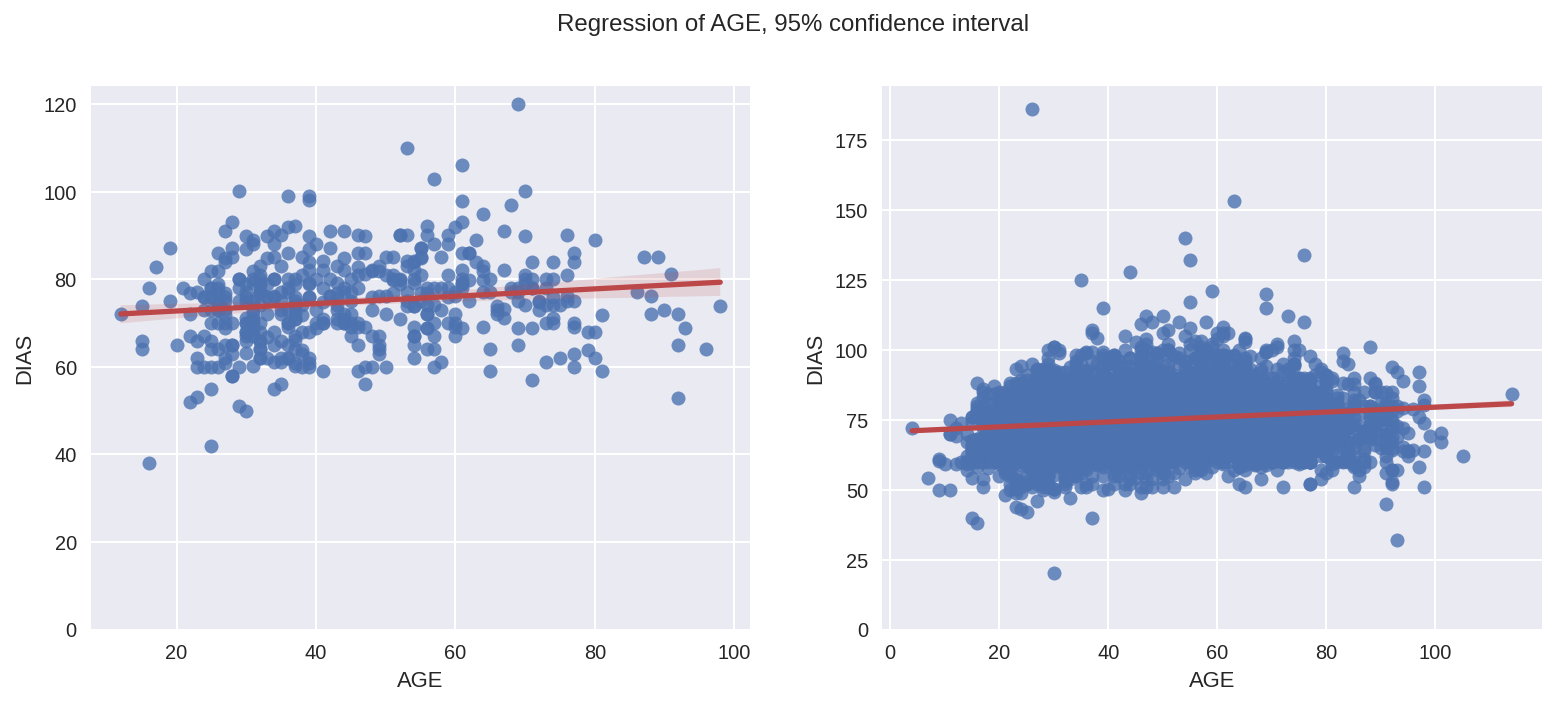

In [246]:
sample2 = df.sample(800, random_state=42)

plt.figure(figsize=(13,5))
plt.suptitle('Regression of AGE, 95% confidence interval')

plt.subplot(1,2,1)
sns.regplot(x = sample2.AGE, y = sample2.DIAS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = df.AGE, y= df.DIAS, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

(0.0, 13.915843186733303)

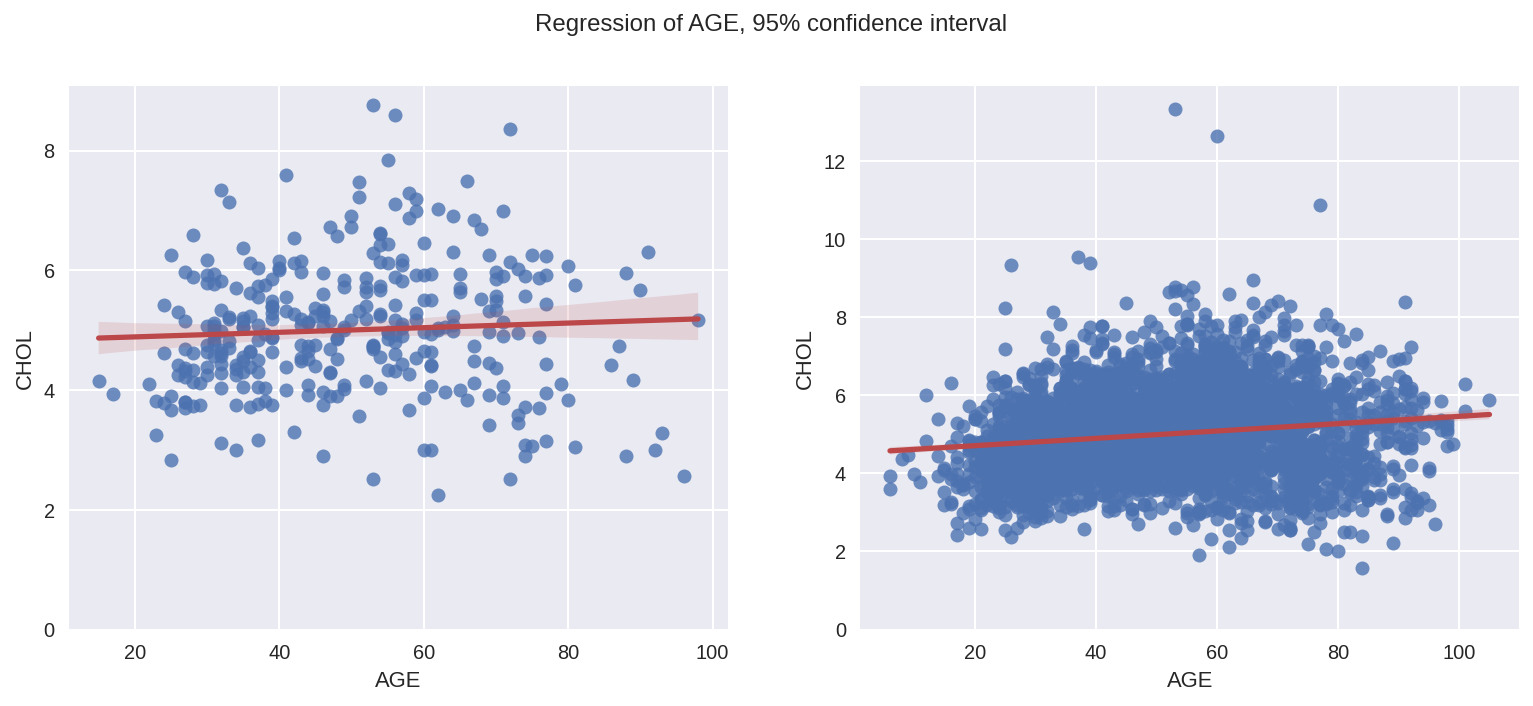

In [247]:
sample2 = df.sample(800, random_state=42)

plt.figure(figsize=(13,5))
plt.suptitle('Regression of AGE, 95% confidence interval')

plt.subplot(1,2,1)
sns.regplot(x = sample2.AGE, y = sample2.CHOL, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = df.AGE, y= df.CHOL, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

(0.0, 3143.6069063174923)

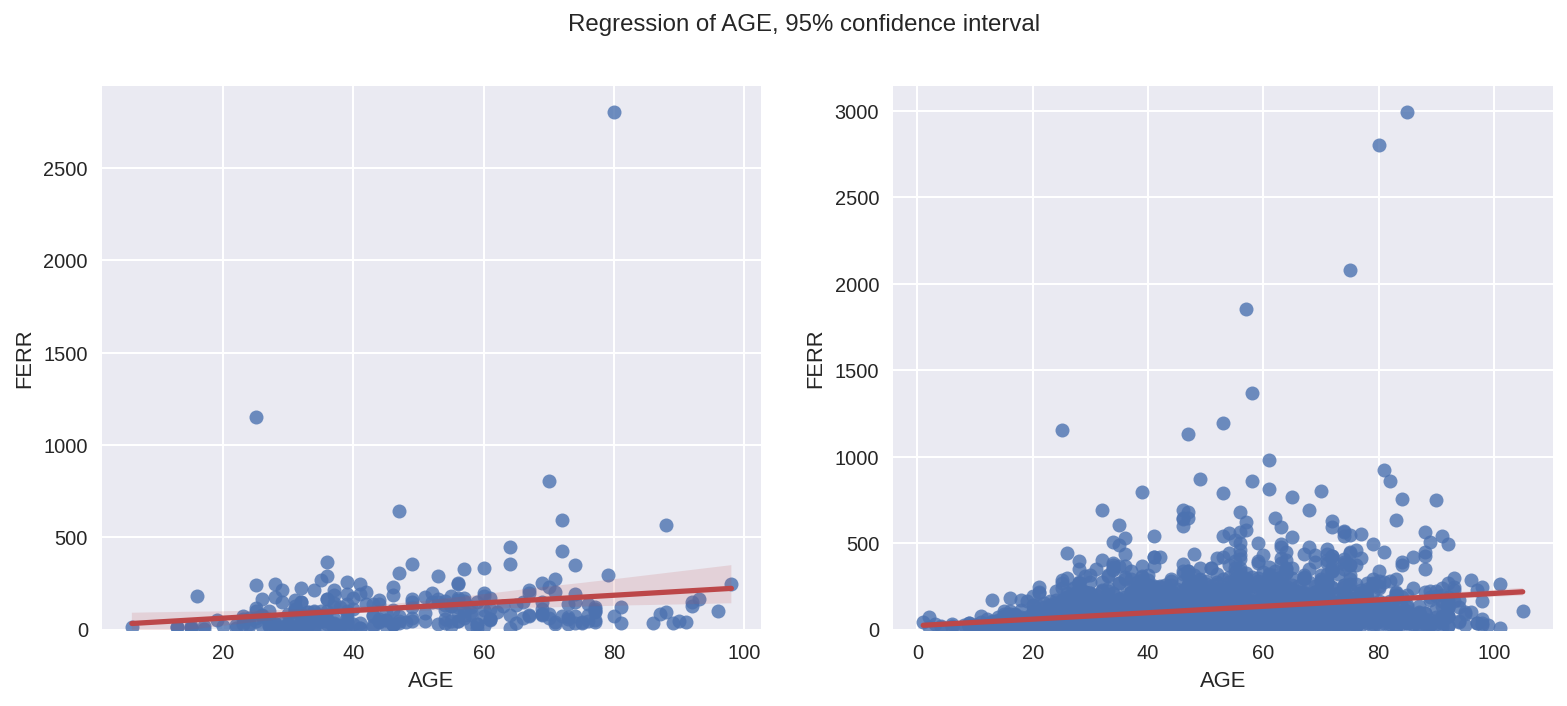

In [248]:
sample2 = df.sample(800, random_state=42)

plt.figure(figsize=(13,5))
plt.suptitle('Regression of AGE, 95% confidence interval')

plt.subplot(1,2,1)
sns.regplot(x = sample2.AGE, y = sample2.FERR, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = df.AGE, y= df.FERR, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

(0.0, 872.2775335260332)

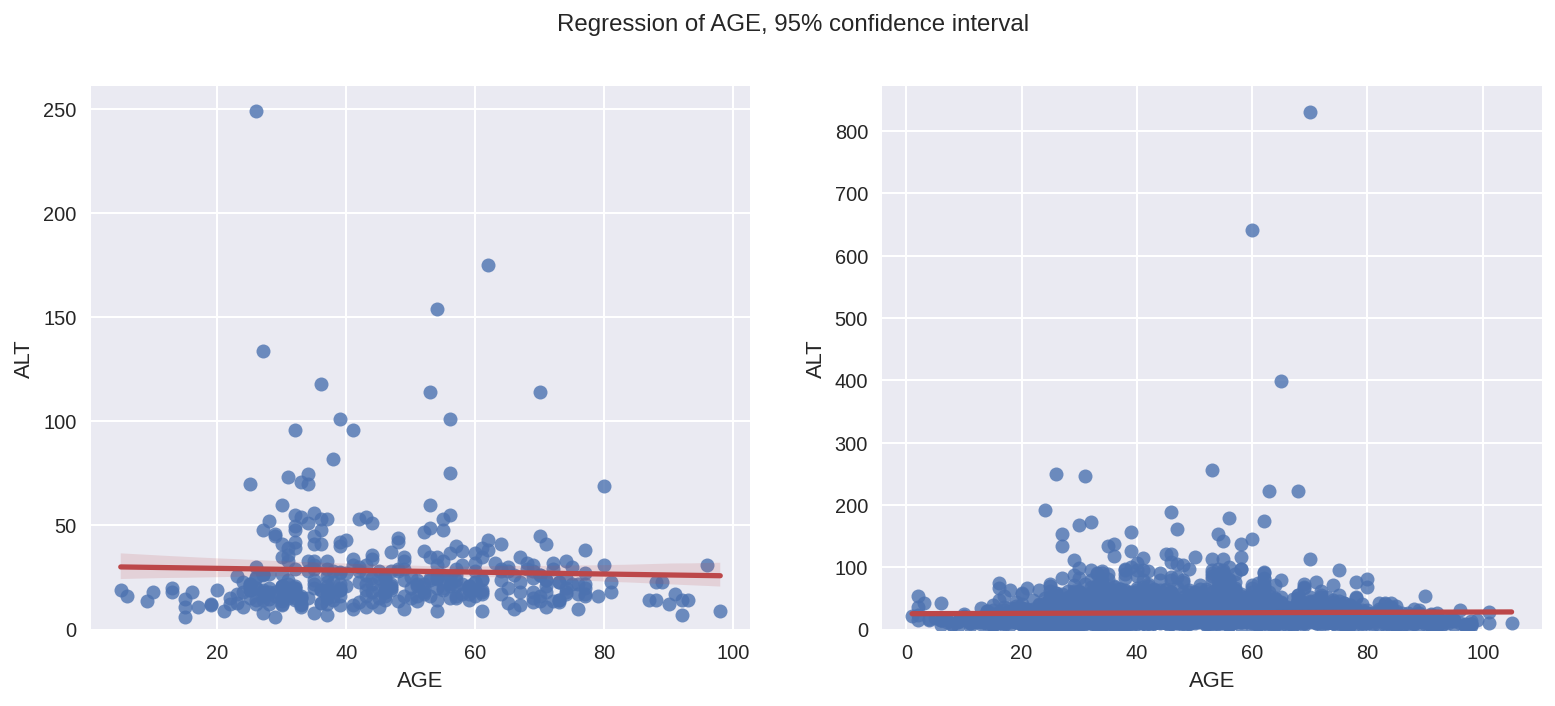

In [249]:
sample2 = df.sample(800, random_state=42)

plt.figure(figsize=(13,5))
plt.suptitle('Regression of AGE, 95% confidence interval')

plt.subplot(1,2,1)
sns.regplot(x = sample2.AGE, y = sample2.ALT, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = df.AGE, y= df.ALT, y_jitter=.1, ci=95, line_kws={"color": "#bc4749"})
plt.ylim(bottom=0)